In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset
%matplotlib inline

In [42]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat_CNN.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig=train_set_y_orig.reshape(4919,)
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


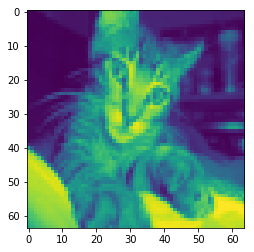

In [43]:
index = 4912
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
#print(classes[1])

In [44]:
m_train = None
m_test = None
num_px = None
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 4919
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (4919, 64, 64)
train_set_y shape: (1, 4919)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [145]:
train_set_x_flatten = None
test_set_x_flatten = None
#print(train_set_x_orig.reshape(12288,64))
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (4096, 4919)
train_set_y shape: (1, 4919)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [208 212 216 220 223]


In [146]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [147]:
def sigmoid(z):
    s = None
    s=1/(1+np.exp(-z))
    return s

In [148]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [149]:
def initialize_with_zeros(dim):
    w = None
    b = None
    w=np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [150]:
dim = 1
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]]
b = 0


In [151]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A = None                                    # compute activation
    cost = None                                 # compute cost
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m) * np.sum((Y * np.log(A)) + (1 - Y) * np.log(1 - A), axis = 1)
    dw = None
    db = None
    
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A - Y, axis = 1)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [152]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = [0.00145558]
cost = 5.801545319394553


In [153]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        
        print(w.shape)
        m = X.shape[1]
        a=w.T
        print("==>",a.shape,X.shape)
        print(np.dot(w.T,X))
        A = sigmoid(np.dot(w.T,X) + b)
        print(A)
        cost = (-1/m) * np.sum((Y * np.log(A)) + (1 - Y) * np.log(1 - A), axis = 1)

        dw = None
        db = None
    
        dw = (1/m) * np.dot(X, (A-Y).T)
        db = (1/m) * np.sum(A - Y, axis = 1)
    
        grads = {"dw": dw,
             "db": db}
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [154]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

(2, 1)
==> (1, 2) (2, 3)
[[ 7.  10.  -7.4]]
[[0.99987661 0.99999386 0.00449627]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.92634694  9.89580519 -7.32203581]]
[[0.99986717 0.99999318 0.00485901]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.85270573  9.79162691 -7.24408418]]
[[0.99985702 0.99999243 0.00525079]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.77907731  9.68746651 -7.16614612]]
[[0.9998461 0.9999916 0.0056739]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.70546271  9.5833254  -7.08822271]]
[[0.99983434 0.99999068 0.00613079]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.63186303  9.47920512 -7.01031513]]
[[0.99982169 0.99998966 0.00662412]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.55827946  9.37510734 -6.93242462]]
[[0.99980807 0.99998852 0.00715672]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.48471329  9.27103385 -6.85455256]]
[[0.99979342 0.99998726 0.00773166]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.41116589  9.16698658 -6.77670041]]
[[0.99977765 0.99998587 0.00835222]]
(2, 1)
==> (1, 2) (2, 3)
[[ 6.33763875  9.0629676  -6.69886974]]
[[0.99976068 0.99998432 0.00902193]]
(2, 

In [236]:
def predict1(w, b, X):
    
    m = X.shape[1]
    print("m=>>",m)
    Y_prediction = np.zeros((1,m))
    print("df",X.shape[0])
    w = w.reshape(4096, 1)
    A = None
    a=w.T
    print(a.shape,X.shape)
    X=X.reshape((4096,150))
    A=sigmoid(np.dot(w.T,X)+b)
   
    for i in range(50):
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [294]:
def predict(w, b, X):
    
    m = X.shape[1]
    print("m=>>",m)
    Y_prediction = np.zeros((1,m))
    print("df",X.shape[0])
    w = w.reshape(4096, 1)
    A = None
    a=w.T
    print(a.shape,X.shape)
    try:
        X=X.reshape((4096,4919))
    except:
        pass
    try:
        X=X.reshape((4096,1))
    except:
        pass
            
    A=sigmoid(np.dot(w.T,X)+b)
   
    for i in range(50):
        try:
            if A[0,i] <= 0.5:
                Y_prediction[0,i] = 0
            else:
                Y_prediction[0,i] = 1
        except:
            pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [292]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

m=>> 3
df 2


ValueError: cannot reshape array of size 2 into shape (4096,1)

In [265]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w = np.zeros((64*64, 1))
    b=0
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = None
    Y_prediction_train = None

    Y_prediction_test = predict1(w, b, test_set_x)
    Y_prediction_train = predict(w, b, train_set_x)
    #print("pred=",np.mean(np.abs(Y_prediction_test - Y_test)))
    #print("Prd=",np.mean(np.abs(Y_train-Y_prediction_train)))
    print("train accuracy: {} %".format(np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [271]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations =1000, learning_rate = 0.005, print_cost = True)

(4096, 1)
==> (1, 4096) (4096, 4919)
[[0. 0. 0. ... 0. 0. 0.]]
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.05081375 1.52033615 1.46347777 ... 3.0349976  4.00083378 1.3947692 ]]
[[0.95492524 0.82095529 0.81244479 ... 0.95423955 0.98207253 0.80174971]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.76921717 1.87854959 1.81205544 ... 3.74352942 4.93657336 1.72517556]]
[[0.97751974 0.86780777 0.85999145 ... 0.97694827 0.99289437 0.84919985]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.2543494  2.12047754 2.0482515  ... 4.22067986 5.56709646 1.94868988]]
[[0.98604661 0.89322445 0.88613774 ... 0.98557569 0.99620674 0.87569953]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.62608869 2.30587147 2.22966993 ... 4.58558604 6.04949542 2.12016855]]
[[0.99034032 0.90969129 0.90323259 ... 0.98994507 0.99765587 0.89323013]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.92931807 2.45710572 2.37792901 ... 4.88277681 6.44250668 2.26017576]]
[[0.99285112 0.92139206 0.91546265 ... 0.99251309 0.99

[[ 8.45533213  4.21622105  4.12222634 ...  8.30359611 10.97719886
   3.89698755]]
[[0.99978907 0.98558043 0.9841818  ... 0.99975451 0.99998306 0.98026464]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.49404242  4.23554246  4.14163489 ...  8.34071032 11.02655521
   3.9150553 ]]
[[0.99979708 0.98585319 0.98448193 ... 0.99976347 0.99998387 0.98061216]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.53195262  4.25446487  4.16064965 ...  8.37704524 11.07488013
   3.93275204]]
[[0.99980464 0.98611539 0.98477054 ... 0.99977192 0.99998464 0.98094673]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.56909451  4.27300413  4.1792862  ...  8.41263193 11.12221466
   3.95009248]]
[[0.99981177 0.98636763 0.98504828 ... 0.9997799  0.99998535 0.98126907]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.60549798  4.29117516  4.19755921 ...  8.4474996  11.16859747
   3.96709045]]
[[0.99981851 0.98661048 0.98531576 ... 0.99978745 0.99998601 0.98157986]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.64119118  4.30899198  4.215482

(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.66505739  4.82025699  4.73296474 ...  9.45658671 12.51335944
   4.46292874]]
[[0.99993718 0.99208021 0.99136404 ... 0.99992262 0.99999636 0.988717  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.68488011  4.83016     4.74305879 ...  9.4753413  12.53840674
   4.47222778]]
[[0.99993842 0.99215788 0.99145029 ... 0.99992406 0.99999645 0.98882061]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.70447832  4.83995108  4.75304185 ...  9.49387824 12.56316573
   4.48142242]]
[[0.99993962 0.99223393 0.99153476 ... 0.99992546 0.99999654 0.98892213]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.72385671  4.84963254  4.76291623 ...  9.51220208 12.58764242
   4.49051485]]
[[0.99994078 0.99230842 0.9916175  ... 0.99992682 0.99999662 0.98902164]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.74301979  4.85920666  4.77268415 ...  9.53031721 12.61184264
   4.49950716]]
[[0.9999419  0.99238138 0.99169855 ... 0.99992813 0.9999967  0.98911917]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.38487511  5.18003384  5.10199086 ... 10.13374296 13.4194955
   4.80127362]]
[[0.99996945 0.99446668 0.99402023 ... 0.99996073 0.99999853 0.99193927]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.39778176  5.18648866  5.10866149 ... 10.14580146 13.43567045
   4.80735439]]
[[0.99996985 0.99450221 0.99405988 ... 0.99996121 0.99999855 0.99198793]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.41058488  5.19289186  5.1152808  ... 10.15775987 13.45171277
   4.81338695]]
[[0.99997023 0.99453723 0.99409898 ... 0.99996167 0.99999858 0.99203591]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.42328592  5.19924418  5.12184951 ... 10.16961962 13.46762431
   4.81937197]]
[[0.99997061 0.99457176 0.99413752 ... 0.99996212 0.9999986  0.99208324]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.4358863   5.20554632  5.12836831 ... 10.18138209 13.4834069
   4.82531009]]
[[0.99997098 0.9946058  0.99417552 ... 0.99996256 0.99999862 0.99212992]]
(4096, 1)
==> (1, 4096) (4096, 4919)


[[0.99998123 0.99565952 0.99535394 ... 0.99997502 0.9999992  0.99358625]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.8800928   5.42783542  5.35971871 ... 10.59370426 14.03778044
   5.03503226]]
[[0.9999814  0.99567992 0.9953768  ... 0.99997523 0.99999921 0.99361468]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.88944441  5.43251795  5.3646254  ... 10.60232978 14.04940435
   5.03945625]]
[[0.99998157 0.99570009 0.99539941 ... 0.99997545 0.99999922 0.9936428 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.89873646  5.43717078  5.36950251 ... 10.61089785 14.06095208
   5.04385247]]
[[0.99998175 0.99572004 0.99542177 ... 0.99997566 0.99999923 0.99367063]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.90796958  5.44179424  5.37435035 ... 10.61940909 14.07242444
   5.0482212 ]]
[[0.99998191 0.99573978 0.9954439  ... 0.99997586 0.99999924 0.99369816]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.9171444   5.44638863  5.37916922 ... 10.6278641  14.08382224
   5.05256274]]
[[0.99998208 0.9957593  0.99546579 

[[0.99998697 0.99638411 0.99616747 ... 0.99998213 0.99999949 0.99460235]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.24243684  5.60937603  5.55119846 ... 10.92586864 14.48642608
   5.2067693 ]]
[[0.99998706 0.99639726 0.99618226 ... 0.99998225 0.9999995  0.99462092]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.2496574   5.61299619  5.55504579 ... 10.93244039 14.49532612
   5.21019895]]
[[0.99998716 0.99641029 0.99619693 ... 0.99998236 0.9999995  0.99463932]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.25683895  5.61659691  5.55887371 ... 10.93897458 14.50417634
   5.21361038]]
[[0.99998725 0.9964232  0.99621146 ... 0.99998248 0.9999995  0.99465756]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.26398184  5.62017835  5.5626824  ... 10.94547155 14.51297718
   5.21700377]]
[[0.99998734 0.996436   0.99622587 ... 0.99998259 0.99999951 0.99467565]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.2710864   5.62374068  5.56647201 ... 10.95193161 14.52172906
   5.22037926]]
[[0.99998743 0.99644868 0.99624015 

(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.52718426  5.75223303  5.70407502 ... 11.18330839 14.83594794
   5.34228249]]
[[0.99999028 0.99687742 0.99672387 ... 0.99998629 0.99999964 0.9953025 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.53295831  5.75513207  5.70720211 ... 11.18848841 14.84300141
   5.3450365 ]]
[[0.99999033 0.99688647 0.99673411 ... 0.99998636 0.99999965 0.99531543]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.53870489  5.7580174   5.71031549 ... 11.19364201 14.85001983
   5.34777766]]
[[0.99999039 0.99689546 0.99674427 ... 0.99998643 0.99999965 0.99532826]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.54442419  5.76088913  5.71341528 ... 11.19876938 14.85700344
   5.35050608]]
[[0.99999044 0.99690438 0.99675436 ... 0.9999865  0.99999965 0.99534099]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.5501164   5.76374736  5.71650158 ... 11.20387072 14.8639525
   5.35322184]]
[[0.9999905  0.99691323 0.99676438 ... 0.99998657 0.99999965 0.99535363]]
(4096, 1)
==> (1, 4096) (4096, 4919)

(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.76236175  5.87039727  5.83250087 ... 11.39271789 15.12190945
   5.45468742]]
[[0.99999232 0.99722613 0.9971193  ... 0.99998888 0.99999973 0.99580235]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.76707068  5.87276525  5.83509675 ... 11.39687465 15.1276047
   5.45694343]]
[[0.99999235 0.99723271 0.99712679 ... 0.99998893 0.99999973 0.99581183]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.77175936  5.87512314  5.83768252 ... 11.40101199 15.13327415
   5.45918998]]
[[0.99999239 0.99723924 0.99713422 ... 0.99998898 0.99999974 0.99582124]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.77642794  5.87747101  5.84025826 ... 11.40513003 15.13891797
   5.46142711]]
[[0.99999243 0.99724574 0.99714161 ... 0.99998902 0.99999974 0.99583059]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.78107653  5.8798089   5.84282402 ... 11.40922887 15.14453632
   5.4636549 ]]
[[0.99999246 0.99725218 0.99714895 ... 0.99998907 0.99999974 0.99583988]]
(4096, 1)
==> (1, 4096) (4096, 4919)

[[0.99999365 0.99747928 0.99740819 ... 0.99999059 0.99999979 0.99616823]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.95587788  5.96778874  5.94013345 ... 11.56213091 15.35477038
   5.54760479]]
[[0.99999367 0.99748427 0.99741391 ... 0.99999062 0.99999979 0.99617548]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.95978758  5.96975818  5.94233007 ... 11.56552097 15.35944748
   5.54948675]]
[[0.9999937  0.99748924 0.9974196  ... 0.99999065 0.99999979 0.99618269]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.96368179  5.9717199   5.94451896 ... 11.56889618 15.36410486
   5.55136147]]
[[0.99999372 0.99749418 0.99742526 ... 0.99999068 0.99999979 0.99618985]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.9675606   5.97367395  5.94670014 ... 11.57225664 15.36874264
   5.55322897]]
[[0.99999375 0.99749908 0.99743088 ... 0.99999072 0.99999979 0.99619698]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.9714241   5.97562035  5.94887367 ... 11.57560241 15.37336092
   5.5550893 ]]
[[0.99999377 0.99750396 0.99743648 

[[0.9999946  0.9976781  0.99763678 ... 0.99999182 0.99999983 0.99645768]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.11761396  6.04933152  6.03187785 ... 11.70107701 15.54716429
   5.6256418 ]]
[[0.99999462 0.99768198 0.99764127 ... 0.99999184 0.99999983 0.99646335]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.12090345  6.05099163  6.03376412 ... 11.70387292 15.55105204
   5.62723321]]
[[0.99999464 0.99768584 0.99764573 ... 0.99999186 0.99999983 0.99646899]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.12418075  6.05264566  6.03564428 ... 11.70665717 15.55492428
   5.6288189 ]]
[[0.99999466 0.99768969 0.99765016 ... 0.99999189 0.99999983 0.99647461]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.12744591  6.05429363  6.03751837 ... 11.7094298  15.55878108
   5.63039891]]
[[0.99999467 0.99769351 0.99765458 ... 0.99999191 0.99999983 0.99648019]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.130699    6.05593559  6.03938641 ... 11.71219087 15.56262253
   5.63197325]]
[[0.99999469 0.99769731 0.99765897 

[[12.24875575  6.11557482  6.10782247 ... 11.81143959 15.70123015
   5.68923993]]
[[0.99999528 0.99783122 0.99781438 ... 0.9999927  0.99999985 0.99668204]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.25157123  6.11699845  6.10947112 ... 11.81378204 15.70451515
   5.69060904]]
[[0.9999953  0.99783432 0.99781799 ... 0.99999271 0.99999985 0.9966866 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.25437681  6.11841714  6.1111148  ... 11.81611502 15.70778755
   5.69197351]]
[[0.99999531 0.9978374  0.99782159 ... 0.99999273 0.99999985 0.99669114]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.25717251  6.1198309   6.11275352 ... 11.81843856 15.71104741
   5.69333334]]
[[0.99999532 0.99784047 0.99782517 ... 0.99999275 0.99999985 0.99669565]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.2599584   6.12123977  6.11438732 ... 11.82075272 15.71429479
   5.69468857]]
[[0.99999534 0.99784353 0.99782873 ... 0.99999277 0.99999985 0.99670015]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.26273451  6.12264375  6.116016

[[0.9999958  0.99795457 0.99795889 ... 0.99999336 0.99999987 0.99686387]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.36624647  6.17504422  6.17738909 ... 11.9080528  15.83735684
   5.74652889]]
[[0.99999581 0.99795709 0.99796186 ... 0.99999337 0.99999987 0.9968676 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.36865726  6.17626589  6.17883446 ... 11.91000863 15.84012765
   5.74770801]]
[[0.99999582 0.99795959 0.99796482 ... 0.99999339 0.99999987 0.99687131]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.37105993  6.1774835   6.18027575 ... 11.9119567  15.84288816
   5.74888332]]
[[0.99999583 0.99796209 0.99796776 ... 0.9999934  0.99999987 0.996875  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.37345451  6.17869708  6.18171297 ... 11.91389706 15.8456384
   5.75005482]]
[[0.99999584 0.99796458 0.9979707  ... 0.99999341 0.99999987 0.99687868]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.37584105  6.17990664  6.18314615 ... 11.91582973 15.84837842
   5.75122255]]
[[0.99999585 0.99796705 0.99797361 .

[[0.9999962  0.99805759 0.99808102 ... 0.99999388 0.99999988 0.99701661]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.46715493  6.22623653  6.23861801 ... 11.98883512 15.95242394
   5.79602838]]
[[0.99999621 0.99805966 0.99808349 ... 0.99999389 0.99999988 0.99701968]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.46923183  6.2272915   6.23989531 ... 11.99047244 15.95477092
   5.79705056]]
[[0.99999622 0.99806172 0.99808595 ... 0.9999939  0.99999988 0.99702274]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.47130199  6.2283431   6.2411692  ... 11.99210333 15.95710934
   5.79806956]]
[[0.99999623 0.99806377 0.9980884  ... 0.99999391 0.99999988 0.99702579]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.47336542  6.22939134  6.24243971 ... 11.99372781 15.95943923
   5.7990854 ]]
[[0.99999624 0.99806581 0.99809084 ... 0.99999392 0.99999988 0.99702883]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.47542216  6.23043624  6.24370684 ... 11.99534591 15.96176063
   5.80009809]]
[[0.99999624 0.99806784 0.99809327 

[[0.99999652 0.99814264 0.99818323 ... 0.99999428 0.99999989 0.99714341]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.55429355  6.2705525   6.29290739 ... 12.05649137 16.05001868
   5.83905139]]
[[0.99999653 0.99814436 0.99818531 ... 0.99999429 0.99999989 0.99714598]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.55609131  6.27146803  6.29404382 ... 12.05786282 16.05201163
   5.83994219]]
[[0.99999654 0.99814607 0.99818738 ... 0.9999943  0.99999989 0.99714853]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.55788341  6.27238074  6.29517739 ... 12.05922887 16.05399739
   5.84083031]]
[[0.99999654 0.99814778 0.99818945 ... 0.99999431 0.9999999  0.99715108]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.55966984  6.27329061  6.2963081  ... 12.06058954 16.05597598
   5.84171577]]
[[0.99999655 0.99814947 0.9981915  ... 0.99999432 0.9999999  0.99715362]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.56145065  6.27419767  6.29743597 ... 12.06194485 16.05794743
   5.84259858]]
[[0.99999656 0.99815116 0.99819356 

[[12.62829164  6.30828565  6.34032953 ... 12.11198075 16.13124064
   5.87584145]]
[[0.99999678 0.99821363 0.99826986 ... 0.9999946  0.9999999  0.99724982]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.62985831  6.30908569  6.34134904 ... 12.11313245 16.13294076
   5.87662333]]
[[0.99999678 0.99821507 0.99827164 ... 0.99999461 0.9999999  0.99725199]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.63142015  6.30988331  6.3423661  ... 12.11427955 16.13463476
   5.87740292]]
[[0.99999679 0.9982165  0.99827341 ... 0.99999461 0.9999999  0.99725415]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.63297716  6.31067852  6.34338072 ... 12.11542208 16.13632266
   5.87818024]]
[[0.99999679 0.99821793 0.99827517 ... 0.99999462 0.9999999  0.9972563 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.63452937  6.31147132  6.3443929  ... 12.11656004 16.13800446
   5.87895529]]
[[0.9999968  0.99821936 0.99827693 ... 0.99999463 0.9999999  0.99725844]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.63607679  6.31226174  6.345402

[[0.99999698 0.99827218 0.99834258 ... 0.99999485 0.99999991 0.99733809]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.69423203  6.34200718  6.38389487 ... 12.1594775  16.20197284
   5.90887377]]
[[0.99999699 0.9982734  0.99834412 ... 0.99999485 0.99999991 0.99733994]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.69559677  6.34270623  6.38481191 ... 12.16043751 16.20341733
   5.90956032]]
[[0.99999699 0.99827462 0.99834565 ... 0.99999486 0.99999991 0.99734178]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.69695736  6.3434032   6.38572684 ... 12.1613936  16.20485658
   5.91024491]]
[[0.99999699 0.99827584 0.99834717 ... 0.99999486 0.99999991 0.99734362]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.69831382  6.34409811  6.38663968 ... 12.16234576 16.2062906
   5.91092754]]
[[0.999997   0.99827705 0.99834869 ... 0.99999487 0.99999991 0.99734545]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.69966617  6.34479096  6.38755042 ... 12.16329403 16.20771941
   5.91160824]]
[[0.999997   0.99827825 0.9983502  .

[[0.99999714 0.99832098 0.99840435 ... 0.99999504 0.99999991 0.99741206]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.74933785  6.37027576  6.42150718 ... 12.19736705 16.25956021
   5.93670392]]
[[0.99999715 0.99832203 0.99840569 ... 0.99999505 0.99999991 0.99741365]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.75053623  6.37089155  6.42233953 ... 12.19816944 16.26079431
   5.9373118 ]]
[[0.99999715 0.99832307 0.99840703 ... 0.99999505 0.99999991 0.99741524]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.75173101  6.37150553  6.42317005 ... 12.19896843 16.26202386
   5.93791798]]
[[0.99999716 0.99832411 0.99840836 ... 0.99999506 0.99999991 0.99741682]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.7529222   6.37211772  6.42399873 ... 12.19976402 16.26324888
   5.93852246]]
[[0.99999716 0.99832515 0.99840969 ... 0.99999506 0.99999992 0.9974184 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.75410982  6.37272812  6.4248256  ... 12.20055623 16.26446938
   5.93912526]]
[[0.99999716 0.99832618 0.99841102 

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.79881043  6.39573965  6.4564682  ... 12.22959236 16.30974614
   5.96190876]]
[[0.99999729 0.99836471 0.99846092 ... 0.99999521 0.99999992 0.99747873]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.79986087  6.39628133  6.45722498 ... 12.23025486 16.31079334
   5.96244656]]
[[0.99999729 0.99836561 0.99846209 ... 0.99999521 0.99999992 0.9974801 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.80090819  6.39682145  6.45798015 ... 12.23091441 16.31183659
   5.96298287]]
[[0.99999729 0.9983665  0.99846326 ... 0.99999521 0.99999992 0.99748147]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.80195238  6.39736     6.45873373 ... 12.23157102 16.3128759
   5.96351771]]
[[0.9999973  0.99836739 0.99846443 ... 0.99999522 0.99999992 0.99748283]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.80299346  6.397897    6.45948571 ... 12.23222469 16.31391128
   5.96405107]]
[[0.9999973  0.99836828 0.99846559 ... 0.99999522 0.99999992 0.99748419]]
(4096, 1)
==> (1, 4096) (4096, 4919)

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.84126821  6.41767299  6.48761995 ... 12.25552108 16.3513536
   5.9837477 ]]
[[0.9999974  0.99840065 0.99850854 ... 0.99999533 0.99999992 0.99753387]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.84219237  6.41815136  6.48831196 ... 12.25606444 16.35224144
   5.98422556]]
[[0.9999974  0.99840143 0.99850958 ... 0.99999533 0.99999992 0.99753506]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.84311379  6.41862836  6.48900256 ... 12.25660521 16.35312581
   5.98470211]]
[[0.99999741 0.9984022  0.99851062 ... 0.99999534 0.99999992 0.99753625]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.84403247  6.41910398  6.48969175 ... 12.2571434  16.35400674
   5.98517736]]
[[0.99999741 0.99840297 0.99851165 ... 0.99999534 0.99999992 0.99753744]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.84494842  6.41957823  6.49037954 ... 12.25767902 16.35488422
   5.98565132]]
[[0.99999741 0.99840374 0.99851269 ... 0.99999534 0.99999992 0.99753862]]
(4096, 1)
==> (1, 4096) (4096, 4919)

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.87943953  6.43747094  6.51678595 ... 12.2770824  16.38727704
   6.00358854]]
[[0.9999975  0.99843247 0.99855182 ... 0.99999543 0.99999993 0.99758299]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.88025031  6.43789241  6.51741957 ... 12.27751904 16.38802196
   6.00401246]]
[[0.9999975  0.99843314 0.99855275 ... 0.99999543 0.99999993 0.99758403]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.88105868  6.43831266  6.51805193 ... 12.27795341 16.38876385
   6.00443523]]
[[0.9999975  0.99843381 0.99855367 ... 0.99999544 0.99999993 0.99758506]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.88186465  6.43873171  6.51868306 ... 12.27838552 16.38950272
   6.00485686]]
[[0.9999975  0.99843448 0.99855459 ... 0.99999544 0.99999993 0.9975861 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.88266822  6.43914956  6.51931295 ... 12.27881538 16.39023856
   6.00527735]]
[[0.99999751 0.99843514 0.99855551 ... 0.99999544 0.99999993 0.99758713]]
(4096, 1)
==> (1, 4096) (4096, 4919

[[12.91221051  6.45454265  6.54294923 ... 12.29389227 16.41667409
   6.02081962]]
[[0.99999758 0.99845944 0.99858961 ... 0.99999551 0.99999993 0.99762492]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.91292371  6.45491508  6.54353235 ... 12.29423729 16.41729617
   6.021197  ]]
[[0.99999758 0.99846003 0.99859044 ... 0.99999551 0.99999993 0.99762583]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.91363477  6.45528644  6.54411435 ... 12.29458031 16.41791557
   6.02157337]]
[[0.99999758 0.99846061 0.99859127 ... 0.99999551 0.99999993 0.99762674]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.91434371  6.45565673  6.54469525 ... 12.29492135 16.4185323
   6.02194872]]
[[0.99999759 0.99846119 0.9985921  ... 0.99999551 0.99999993 0.99762765]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.91505054  6.45602596  6.54527506 ... 12.29526039 16.41914637
   6.02232306]]
[[0.99999759 0.99846177 0.99859292 ... 0.99999552 0.99999993 0.99762855]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.91575525  6.45639412  6.5458537

[[12.94227895  6.47028311  6.56813654 ... 12.30752125 16.44212124
   6.03683386]]
[[0.99999765 0.99848395 0.99862508 ... 0.99999557 0.99999993 0.99766332]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94290203  6.4706102   6.56867277 ... 12.30778191 16.44263004
   6.03716815]]
[[0.99999765 0.99848446 0.99862583 ... 0.99999557 0.99999993 0.99766411]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94352323  6.47093634  6.56920801 ... 12.30804082 16.44313648
   6.03750154]]
[[0.99999766 0.99848496 0.99862657 ... 0.99999557 0.99999993 0.99766491]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94414256  6.47126153  6.56974228 ... 12.30829797 16.44364057
   6.03783403]]
[[0.99999766 0.99848547 0.99862731 ... 0.99999557 0.99999993 0.9976657 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94476002  6.47158579  6.57027558 ... 12.30855339 16.44414232
   6.03816564]]
[[0.99999766 0.99848597 0.99862806 ... 0.99999558 0.99999993 0.99766648]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94537562  6.47190911  6.570807

==> (1, 4096) (4096, 4919)
[[12.96853107  6.48410192  6.5913328  ... 12.31758323 16.46277465
   6.05102057]]
[[0.99999771 0.9985052  0.99865699 ... 0.99999562 0.99999993 0.99769688]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.96907463  6.48438893  6.59182741 ... 12.31776969 16.46318365
   6.05131672]]
[[0.99999772 0.99850564 0.99865766 ... 0.99999562 0.99999993 0.99769758]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.96961653  6.48467511  6.59232115 ... 12.31795461 16.46359057
   6.05161207]]
[[0.99999772 0.99850608 0.99865833 ... 0.99999562 0.99999993 0.99769827]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.97015677  6.48496045  6.59281402 ... 12.31813799 16.46399541
   6.05190663]]
[[0.99999772 0.99850651 0.998659   ... 0.99999562 0.99999993 0.99769897]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.97069537  6.48524495  6.59330602 ... 12.31831983 16.46439819
   6.05220039]]
[[0.99999772 0.99850695 0.99865967 ... 0.99999562 0.99999993 0.99769966]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.971

[0.69314718 0.01200118 0.01030491 0.00978454 0.0095462  0.0094122
 0.00932562 0.00926346 0.009215   0.00917478]
0.005


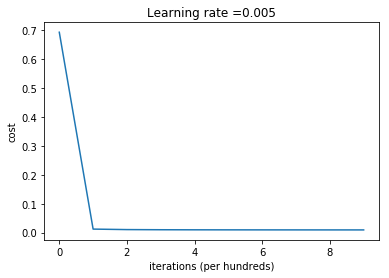

In [272]:
costs = np.squeeze(d['costs'])
print(costs)
print(str(d["learning_rate"]))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [228]:
print(12288*50)
print(4096*150)
20148224/4096 

614400
614400


4919.0

learning rate is: 0.01
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0. 0. 0. ... 0. 0. 0.]]
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.1016275  3.04067229 2.92695554 ... 6.06999521 8.00166757 2.7895384 ]]
[[0.99777689 0.95459505 0.9494034  ... 0.99770561 0.99966688 0.94237964]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.3749973  3.17711704 3.06201318 ... 6.33577094 8.35385312 2.91639556]]
[[0.99830825 0.96016718 0.9555241  ... 0.99824069 0.99976581 0.94890853]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.6111579  3.29499397 3.17887532 ... 6.56504334 8.65776999 3.02606699]]
[[0.99866398 0.96444809 0.96024464 ... 0.99860102 0.99982722 0.95398301]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.81934959 3.39891393 3.28204571 ... 6.76690328 8.92543298 3.12281266]]
[[0.99891507 0.96785182 0.96400981 ... 0.99885672 0.99986782 0.95805805]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.00568649 3.49192792 3.37450748 ... 6.94736095 9.16478656 3.20945289]]
[[0.99909955 0.97062957 0.96709

[[ 9.88425573  4.92962113  4.82253436 ...  9.7019402  12.83085666
   4.55487796]]
[[0.99994954 0.99289334 0.99209642 ... 0.99993945 0.99999735 0.98969582]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.91946725  4.94722624  4.84057982 ...  9.73509599 12.87521101
   4.57143825]]
[[0.99995129 0.9930169  0.99223711 ... 0.99994142 0.99999746 0.98986392]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.95396034  4.96447296  4.85826895 ...  9.76755675 12.91864408
   4.58766392]]
[[0.99995294 0.99313587 0.99237261 ... 0.9999433  0.99999757 0.99002599]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.98776139  4.98137447  4.87561479 ...  9.79934814 12.96118984
   4.60356724]]
[[0.99995451 0.9932505  0.99250321 ... 0.99994508 0.99999767 0.99018235]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.02089538  4.99794322  4.89262969 ...  9.83049438 13.0028804
   4.61915982]]
[[0.99995599 0.99336104 0.99262916 ... 0.99994676 0.99999777 0.99033331]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.05338592  5.01419099  4.9093253

[[0.99998284 0.99585015 0.99547383 ... 0.99997784 0.99999931 0.99378862]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.97912572  5.47756757  5.39085955 ... 10.72178082 14.20036545
   5.07170177]]
[[0.99998315 0.99588715 0.99551629 ... 0.9999782  0.99999933 0.99384094]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.99677939  5.48641485  5.40018068 ... 10.7379856  14.22224181
   5.08007467]]
[[0.99998344 0.99592338 0.99555786 ... 0.99997855 0.99999934 0.9938922 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.01421713  5.49515443  5.40939426 ... 10.75398246 14.24384231
   5.08834672]]
[[0.99998373 0.99595885 0.99559858 ... 0.9999789  0.99999936 0.99394243]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.03144328  5.50378848  5.41850244 ... 10.76977562 14.26517253
   5.09651995]]
[[0.99998401 0.9959936  0.99563847 ... 0.99997923 0.99999937 0.99399165]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.04846206  5.5123191   5.42750731 ... 10.78536914 14.28623787
   5.10459632]]
[[0.99998428 0.99602763 0.99567755 

(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.59577082  5.78698877  5.72116431 ... 11.28077026 14.95852592
   5.36528493]]
[[0.99999092 0.99698256 0.99677792 ... 0.99998755 0.99999969 0.99540702]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.60681447  5.79253923  5.7271885  ... 11.29061974 14.97196721
   5.37056795]]
[[0.99999102 0.9969993  0.9967973  ... 0.99998768 0.99999969 0.99543123]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.61775547  5.79803849  5.73316139 ... 11.3003707  14.98527768
   5.37580293]]
[[0.99999112 0.99701579 0.9968164  ... 0.9999878  0.99999969 0.9954551 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.62859526  5.80348727  5.73908371 ... 11.31002454 14.99845918
   5.38099054]]
[[0.99999121 0.99703204 0.99683522 ... 0.99998791 0.9999997  0.99547864]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[11.63933526  5.80888627  5.74495616 ... 11.3195826  15.01151351
   5.38613145]]
[[0.99999131 0.99704805 0.99685378 ... 0.99998803 0.9999997  0.99550184]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.00794035  5.99446168  5.94984311 ... 11.64268475 15.45538577
   5.56331528]]
[[0.99999399 0.99754931 0.99743777 ... 0.99999134 0.99999981 0.99623331]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.01546438  5.99825637  5.95410609 ... 11.64916066 15.46434569
   5.56694972]]
[[0.99999404 0.99755862 0.9974487  ... 0.9999914  0.99999981 0.99624701]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.02292967  6.00202177  5.95833962 ... 11.65558034 15.4732309
   5.57055661]]
[[0.99999408 0.99756783 0.99745951 ... 0.99999145 0.99999981 0.99626056]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.03033686  6.00575816  5.96254402 ... 11.66194443 15.4820422
   5.57413626]]
[[0.99999413 0.99757694 0.9974702  ... 0.99999151 0.99999981 0.99627396]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.03768656  6.00946589  5.96671961 ... 11.66825352 15.49078041
   5.57768895]]
[[0.99999417 0.99758594 0.99748077 ... 0.99999156 0.99999982 0.99628721]]
(4096, 1)
==> (1, 4096) (4096, 4919)


[[12.29071599  6.13733493  6.11318434 ... 11.88145643 15.78824568
   5.70057682]]
[[0.99999548 0.9978769  0.99782511 ... 0.99999319 0.99999986 0.99671793]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.29615015  6.14008665  6.11639793 ... 11.88593481 15.79454965
   5.70323036]]
[[0.9999955  0.99788276 0.99783212 ... 0.99999322 0.99999986 0.99672667]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.30154637  6.14281943  6.11959242 ... 11.89037699 15.80080545
   5.70586608]]
[[0.99999553 0.99788857 0.99783906 ... 0.99999325 0.99999986 0.99673532]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.30690499  6.14553344  6.122768   ... 11.89478329 15.80701352
   5.70848414]]
[[0.99999555 0.99789432 0.99784594 ... 0.99999328 0.99999987 0.99674389]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.31222636  6.14822886  6.12592483 ... 11.89915403 15.81317429
   5.71108468]]
[[0.99999557 0.99790002 0.99785276 ... 0.99999331 0.99999987 0.99675239]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.3175108   6.15090583  6.129063

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.49794166  6.24249311  6.23852247 ... 12.04810901 16.02516825
   5.80234325]]
[[0.99999633 0.99809003 0.99808244 ... 0.99999424 0.99999989 0.99703706]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.50198126  6.24454838  6.24103299 ... 12.05125824 16.02970302
   5.80434078]]
[[0.99999634 0.99809398 0.99808728 ... 0.99999426 0.99999989 0.997043  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.50599466  6.24659056  6.24353027 ... 12.05438255 16.03420459
   5.80632597]]
[[0.99999636 0.99809789 0.99809207 ... 0.99999428 0.99999989 0.9970489 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.50998208  6.24861976  6.24601442 ... 12.05748214 16.03867322
   5.80829892]]
[[0.99999637 0.99810177 0.99809683 ... 0.99999429 0.99999989 0.99705476]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.51394371  6.25063608  6.24848554 ... 12.06055719 16.04310918
   5.81025973]]
[[0.99999638 0.99810562 0.99810155 ... 0.99999431 0.99999989 0.99706056]]
(4096, 1)
==> (1, 4096) (4096, 4919

[[12.65640606  6.32332616  6.33969329 ... 12.16765857 16.19969579
   5.88123941]]
[[0.99999687 0.99823947 0.998268   ... 0.99999489 0.99999991 0.99726337]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.65944266  6.32488004  6.34169567 ... 12.16985485 16.20296041
   5.88276387]]
[[0.99999688 0.99824222 0.99827148 ... 0.9999949  0.99999991 0.99726758]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.66246048  6.32642452  6.34368852 ... 12.17203332 16.20620127
   5.88427945]]
[[0.99999689 0.99824496 0.99827495 ... 0.99999491 0.99999991 0.99727175]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.66545965  6.32795967  6.34567188 ... 12.17419411 16.20941854
   5.88578623]]
[[0.9999969  0.99824768 0.99827839 ... 0.99999493 0.99999991 0.99727589]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.66844031  6.32948556  6.34764584 ... 12.17633735 16.2126124
   5.88728425]]
[[0.9999969  0.99825037 0.99828181 ... 0.99999494 0.99999991 0.99728   ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.67140258  6.33100225  6.3496104

(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.77383695  6.38359977  6.41956087 ... 12.24896884 16.32288362
   5.94066429]]
[[0.99999722 0.99834346 0.99840188 ... 0.99999529 0.99999992 0.9974227 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.77615693  6.38479493  6.42119801 ... 12.25048672 16.32524252
   5.94184967]]
[[0.99999722 0.99834546 0.99840451 ... 0.9999953  0.99999992 0.99742578]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.77846291  6.38598308  6.422828   ... 12.25199137 16.32758375
   5.94302841]]
[[0.99999723 0.99834745 0.99840713 ... 0.99999531 0.99999992 0.99742885]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.78075498  6.38716426  6.42445087 ... 12.25348289 16.32990743
   5.94420056]]
[[0.99999724 0.99834942 0.99840974 ... 0.99999532 0.99999992 0.99743189]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.78303324  6.38833851  6.42606667 ... 12.25496136 16.33221367
   5.94536616]]
[[0.99999724 0.99835138 0.99841233 ... 0.99999532 0.99999992 0.99743492]]
(4096, 1)
==> (1, 4096) (4096, 4919

[[0.99999746 0.99841967 0.99850452 ... 0.99999555 0.99999993 0.9975409 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.865548    6.43102181  6.48672673 ... 12.30530368 16.41302768
   5.98798395]]
[[0.99999746 0.99842115 0.99850657 ... 0.99999556 0.99999993 0.99754322]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.8673173   6.43194083  6.48808113 ... 12.30630244 16.41469213
   5.98890776]]
[[0.99999747 0.99842263 0.99850861 ... 0.99999556 0.99999993 0.99754552]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.86907599  6.43285453  6.48943007 ... 12.30729124 16.41634322
   5.98982653]]
[[0.99999747 0.99842409 0.99851064 ... 0.99999556 0.99999993 0.9975478 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.87082414  6.43376295  6.49077357 ... 12.30827012 16.41798104
   5.99074027]]
[[0.99999748 0.99842554 0.99851266 ... 0.99999557 0.99999993 0.99755007]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.87256181  6.4346661   6.49211166 ... 12.30923916 16.41960567
   5.99164903]]
[[0.99999748 0.99842698 0.99851467 

[[0.99999763 0.99847756 0.99858702 ... 0.99999571 0.99999993 0.99763197]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.9354999   6.46752201  6.54267448 ... 12.3411743  16.47576392
   6.02494626]]
[[0.99999763 0.99847866 0.99858865 ... 0.99999571 0.99999993 0.99763372]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.93684849  6.4682296   6.5438109  ... 12.34177852 16.47689921
   6.02566929]]
[[0.99999764 0.99847976 0.99859027 ... 0.99999572 0.99999993 0.99763546]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.93818892  6.46893309  6.54494305 ... 12.3423751  16.47802424
   6.02638842]]
[[0.99999764 0.99848085 0.99859188 ... 0.99999572 0.99999993 0.99763719]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.93952123  6.46963249  6.54607098 ... 12.34296409 16.47913907
   6.02710366]]
[[0.99999764 0.99848193 0.99859349 ... 0.99999572 0.99999993 0.99763891]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.94084546  6.47032782  6.54719469 ... 12.34354553 16.48024376
   6.02781504]]
[[0.99999765 0.998483   0.99859508 

[[0.99999776 0.99852083 0.9986532  ... 0.9999958  0.99999993 0.99770121]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.98870906  6.49559703  6.58990252 ... 12.36138712 16.51747003
   6.0538973 ]]
[[0.99999776 0.99852165 0.99865452 ... 0.9999958  0.99999993 0.99770254]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.98973157  6.49614028  6.59086805 ... 12.36168742 16.51819641
   6.05446381]]
[[0.99999776 0.99852248 0.99865583 ... 0.9999958  0.99999993 0.99770387]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.99074771  6.49668031  6.59183022 ... 12.36198181 16.51891482
   6.05502725]]
[[0.99999776 0.99852329 0.99865714 ... 0.99999581 0.99999993 0.9977052 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.99175751  6.49721714  6.59278905 ... 12.36227032 16.5196253
   6.05558764]]
[[0.99999777 0.99852411 0.99865845 ... 0.99999581 0.99999993 0.99770651]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[12.99276101  6.49775078  6.59374455 ... 12.36255298 16.5203279
   6.05614499]]
[[0.99999777 0.99852491 0.99865975 ..

[[13.02810191  6.51667043  6.62941957 ... 12.36941586 16.54243266
   6.07612128]]
[[0.99999785 0.99855331 0.99870736 ... 0.99999584 0.99999994 0.99775427]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.02887409  6.51708706  6.63025211 ... 12.36948461 16.54284627
   6.07656678]]
[[0.99999785 0.99855393 0.99870845 ... 0.99999584 0.99999994 0.9977553 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.02964124  6.51750114  6.63108197 ... 12.36954873 16.54325361
   6.07700984]]
[[0.99999785 0.99855455 0.99870954 ... 0.99999584 0.99999994 0.99775632]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.03040337  6.51791267  6.63190913 ... 12.36960823 16.5436547
   6.07745047]]
[[0.99999785 0.99855516 0.99871062 ... 0.99999584 0.99999994 0.99775734]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.03116052  6.51832169  6.63273363 ... 12.36966315 16.54404958
   6.07788867]]
[[0.99999785 0.99855577 0.9987117  ... 0.99999584 0.99999994 0.99775835]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.03191272  6.51872818  6.6335554

(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.05764477  6.53275181  6.66366461 ... 12.36837118 16.55511246
   6.09356543]]
[[0.99999791 0.99857719 0.99875156 ... 0.99999584 0.99999994 0.99779431]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.05821853  6.53306764  6.66439    ... 12.36825807 16.55527923
   6.09391419]]
[[0.99999791 0.99857765 0.99875248 ... 0.99999584 0.99999994 0.99779511]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.05878829  6.53338142  6.6651132  ... 12.36814132 16.55544103
   6.094261  ]]
[[0.99999791 0.99857812 0.99875339 ... 0.99999584 0.99999994 0.9977959 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.05935406  6.53369318  6.66583423 ... 12.36802093 16.55559789
   6.09460585]]
[[0.99999791 0.99857858 0.99875431 ... 0.99999584 0.99999994 0.99779669]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.05991588  6.53400292  6.6665531  ... 12.36789694 16.55574984
   6.09494876]]
[[0.99999792 0.99857904 0.99875522 ... 0.99999584 0.99999994 0.99779747]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.07977949  6.54508372  6.69428375 ... 12.35993612 16.55805347
   6.10744812]]
[[0.99999796 0.99859542 0.99878987 ... 0.9999958  0.99999994 0.99782593]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.08019214  6.54531725  6.69492033 ... 12.35967704 16.55802088
   6.10771751]]
[[0.99999796 0.99859577 0.99879065 ... 0.9999958  0.99999994 0.99782654]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.08060162  6.54554915  6.69555515 ... 12.35941512 16.55798438
   6.10798533]]
[[0.99999796 0.99859611 0.99879143 ... 0.9999958  0.99999994 0.99782715]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.08100794  6.54577943  6.6961882  ... 12.35915035 16.55794399
   6.10825158]]
[[0.99999796 0.99859645 0.99879221 ... 0.9999958  0.99999994 0.99782776]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.08141112  6.5460081   6.6968195  ... 12.35888276 16.55789973
   6.10851627]]
[[0.99999796 0.99859679 0.99879299 ... 0.9999958  0.99999994 0.99782836]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.09513932  6.55392194  6.72072017 ... 12.34603281 16.55317754
   6.11790855]]
[[0.99999799 0.99860855 0.99882206 ... 0.99999575 0.99999994 0.99784971]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.09542672  6.55409103  6.72128598 ... 12.34566188 16.55299098
   6.11811542]]
[[0.99999799 0.9986088  0.99882274 ... 0.99999575 0.99999994 0.99785018]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.09571158  6.55425882  6.72185033 ... 12.34528872 16.55280132
   6.11832101]]
[[0.99999799 0.99860905 0.99882342 ... 0.99999574 0.99999994 0.99785065]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.09599393  6.5544253   6.72241325 ... 12.34491333 16.55260858
   6.11852534]]
[[0.99999799 0.9986093  0.9988241  ... 0.99999574 0.99999994 0.99785112]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.09627377  6.55459049  6.72297472 ... 12.34453572 16.55241278
   6.11872841]]
[[0.99999799 0.99860955 0.99882477 ... 0.99999574 0.99999994 0.99785158]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1053656   6.56008875  6.74381546 ... 12.32820719 16.5425523
   6.12572617]]
[[0.99999801 0.99861784 0.99884955 ... 0.99999567 0.99999994 0.99786757]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1055552   6.56020711  6.74432433 ... 12.32775049 16.54224649
   6.12588345]]
[[0.99999801 0.99861802 0.99885015 ... 0.99999567 0.99999994 0.99786793]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10574277  6.56032441  6.744832   ... 12.32729203 16.54193822
   6.1260397 ]]
[[0.99999801 0.9986182  0.99885074 ... 0.99999567 0.99999994 0.99786829]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10592833  6.56044066  6.74533848 ... 12.32683182 16.5416275
   6.12619491]]
[[0.99999801 0.99861837 0.99885134 ... 0.99999567 0.99999994 0.99786865]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10611188  6.56055586  6.74584376 ... 12.32636988 16.54131435
   6.1263491 ]]
[[0.99999801 0.99861855 0.99885193 ... 0.99999567 0.99999994 0.997869  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)


(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11203498  6.56444009  6.76559739 ... 12.30605251 16.5265384
   6.13184434]]
[[0.99999803 0.9986246  0.99887494 ... 0.99999558 0.99999994 0.99788173]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1121432   6.56451577  6.76605711 ... 12.30552607 16.52613436
   6.13195954]]
[[0.99999803 0.99862472 0.99887547 ... 0.99999558 0.99999994 0.997882  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11224982  6.56459061  6.76651584 ... 12.30499829 16.52572842
   6.1320739 ]]
[[0.99999803 0.99862484 0.998876   ... 0.99999557 0.99999994 0.99788227]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11235486  6.56466461  6.76697359 ... 12.30446916 16.52532056
   6.13218744]]
[[0.99999803 0.99862496 0.99887652 ... 0.99999557 0.99999993 0.99788254]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11245831  6.56473777  6.76743035 ... 12.3039387  16.52491081
   6.13230014]]
[[0.99999803 0.99862507 0.99887705 ... 0.99999557 0.99999993 0.9978828 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)

[[0.99999803 0.99862888 0.99889707 ... 0.99999547 0.99999993 0.997892  ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1154378   6.56706755  6.78536422 ... 12.2811374  16.50660568
   6.13625396]]
[[0.99999803 0.99862896 0.99889754 ... 0.99999547 0.99999993 0.9978922 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11548199  6.56710918  6.78578342 ... 12.28055779 16.5061254
   6.1363352 ]]
[[0.99999803 0.99862903 0.99889802 ... 0.99999547 0.99999993 0.99789239]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11552492  6.56715013  6.7862018  ... 12.27997716 16.50564365
   6.13641577]]
[[0.99999803 0.99862911 0.99889849 ... 0.99999547 0.99999993 0.99789259]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11556661  6.56719042  6.78661937 ... 12.27939551 16.50516042
   6.13649566]]
[[0.99999803 0.99862918 0.99889896 ... 0.99999546 0.99999993 0.99789278]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11560706  6.56723004  6.78703614 ... 12.27881286 16.50467573
   6.13657489]]
[[0.99999803 0.99862925 0.99889943 .

[[0.99999804 0.99863139 0.99891746 ... 0.99999535 0.99999993 0.99789957]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11627908  6.56832153  6.80346711 ... 12.25413449 16.48364697
   6.13928525]]
[[0.99999804 0.99863142 0.99891789 ... 0.99999535 0.99999993 0.99789971]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11627327  6.56833608  6.80385279 ... 12.25351509 16.48310822
   6.13933911]]
[[0.99999804 0.99863146 0.99891832 ... 0.99999535 0.99999993 0.99789985]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1162665   6.5683501   6.80423779 ... 12.25289494 16.48256835
   6.13939243]]
[[0.99999804 0.99863149 0.99891875 ... 0.99999534 0.99999993 0.99789999]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11625875  6.56836358  6.80462212 ... 12.25227404 16.48202736
   6.13944521]]
[[0.99999804 0.99863153 0.99891918 ... 0.99999534 0.99999993 0.99790012]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11625005  6.56837654  6.80500578 ... 12.2516524  16.48148526
   6.13949744]]
[[0.99999804 0.99863156 0.9989196  

[[13.11521712  6.56849872  6.81947394 ... 12.22688355 16.45954872
   6.14114134]]
[[0.99999804 0.99863237 0.99893561 ... 0.99999522 0.99999993 0.99790468]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11517424  6.56849272  6.81983292 ... 12.22623631 16.45896762
   6.14117405]]
[[0.99999803 0.99863238 0.998936   ... 0.99999522 0.99999993 0.99790478]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.1151306   6.56848629  6.82019135 ... 12.22558852 16.45838567
   6.14120632]]
[[0.99999803 0.99863239 0.99893639 ... 0.99999522 0.99999993 0.99790487]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11508621  6.56847943  6.8205492  ... 12.2249402  16.45780287
   6.14123816]]
[[0.99999803 0.9986324  0.99893679 ... 0.99999521 0.99999993 0.99790496]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11504108  6.56847216  6.8209065  ... 12.22429133 16.45721924
   6.14126955]]
[[0.99999803 0.9986324  0.99893718 ... 0.99999521 0.99999993 0.99790505]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11499521  6.56846447  6.821263

[[13.11260299  6.56783937  6.83509874 ... 12.19727739 16.43263772
   6.14220612]]
[[0.99999803 0.99863221 0.99895265 ... 0.99999508 0.99999993 0.99790803]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11253044  6.5678164   6.83543437 ... 12.19660968 16.43202382
   6.14222099]]
[[0.99999803 0.99863219 0.99895302 ... 0.99999508 0.99999993 0.99790809]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11245732  6.56779309  6.83576953 ... 12.19594161 16.43140931
   6.14223552]]
[[0.99999803 0.99863218 0.99895338 ... 0.99999508 0.99999993 0.99790814]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11238363  6.56776946  6.83610422 ... 12.19527317 16.4307942
   6.14224969]]
[[0.99999803 0.99863216 0.99895374 ... 0.99999507 0.99999993 0.9979082 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11230939  6.56774549  6.83643845 ... 12.19460437 16.43017848
   6.14226351]]
[[0.99999803 0.99863215 0.99895411 ... 0.99999507 0.99999993 0.99790825]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.11223459  6.5677212   6.8367722

[[13.10882742  6.56650295  6.84975993 ... 12.16691497 16.40447018
   6.14255001]]
[[0.99999802 0.99863111 0.99896843 ... 0.99999493 0.99999993 0.99790987]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10873282  6.56646681  6.85007605 ... 12.16623403 16.40383311
   6.14255064]]
[[0.99999802 0.99863108 0.99896877 ... 0.99999493 0.99999993 0.99790989]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10863781  6.56643041  6.85039177 ... 12.16555286 16.40319562
   6.14255099]]
[[0.99999802 0.99863105 0.99896911 ... 0.99999493 0.99999993 0.99790992]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10854239  6.56639376  6.8507071  ... 12.16487147 16.40255772
   6.14255106]]
[[0.99999802 0.99863101 0.99896945 ... 0.99999492 0.99999993 0.99790994]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10844657  6.56635685  6.85102204 ... 12.16418986 16.4019194
   6.14255085]]
[[0.99999802 0.99863098 0.99896978 ... 0.99999492 0.99999993 0.99790997]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[13.10835033  6.5663197   6.8513365

[[4.29352227 2.1402491  2.07396734 ... 4.24854113 5.60678935 1.97007911]]
[[0.98657782 0.89511241 0.88872452 ... 0.98596895 0.99635447 0.87802834]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.36628927 2.17653488 2.10946582 ... 4.31997831 5.70122016 2.00363969]]
[[0.98750894 0.89847722 0.89219389 ... 0.98692461 0.99668211 0.88158468]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.43620783 2.2114006  2.14358694 ... 4.38859849 5.79193301 2.0358924 ]]
[[0.98834344 0.90161982 0.89543867 ... 0.987782   0.99696918 0.88491752]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.50349559 2.24495475 2.17643555 ... 4.45461754 5.87921266 2.06693696]]
[[0.98909443 0.90456209 0.89848066 ... 0.9885544  0.99722197 0.88804817]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.56834613 2.27729381 2.20810492 ... 4.5182274  5.96331232 2.0968621 ]]
[[0.98977287 0.9073231  0.90133889 ... 0.98925289 0.99744564 0.89099525]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.63093238 2.30850399 2.23867842 ... 4.57959954 6.04445815 2.12574708]]
[

[[0.99795729 0.95646472 0.95289833 ... 0.99777189 0.99968425 0.94534853]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.21164822 3.09684703 3.01421746 ... 6.12389022 8.08798208 2.85683336]]
[[0.9980097  0.957003   0.95347159 ... 0.99782754 0.99969467 0.94596955]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.23730076 3.1096419  3.02685934 ... 6.14885461 8.12104619 2.86872278]]
[[0.99806006 0.95752759 0.95403049 ... 0.99788105 0.99970461 0.94657547]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.26260234 3.12226176 3.03933012 ... 6.17347422 8.15365467 2.88045034]]
[[0.99810849 0.95803901 0.95457556 ... 0.99793253 0.99971409 0.94716686]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.28756256 3.13471141 3.05163448 ... 6.1977585  8.18582002 2.89202046]]
[[0.99815509 0.95853776 0.95510732 ... 0.99798209 0.99972314 0.94774426]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.31219065 3.14699544 3.0637769  ... 6.22171655 8.21755424 2.90343738]]
[[0.99819994 0.95902432 0.95562626 ... 0.99802982 0.9997318  0.94830816]]
(

[[0.99920552 0.9723984  0.96996796 ... 0.99910918 0.99990642 0.96408231]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.14583387 3.5628293  3.47588564 ... 7.03077787 9.28983668 3.29034727]]
[[0.9992179  0.97260831 0.97019434 ... 0.99912262 0.99990829 0.96433468]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.16140109 3.57059505 3.48360261 ... 7.0458491  9.30982364 3.29758092]]
[[0.99922999 0.97281494 0.97041722 ... 0.99913575 0.9999101  0.96458328]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.17683968 3.57829667 3.49125663 ... 7.0607944  9.32964407 3.30475513]]
[[0.99924179 0.97301836 0.97063669 ... 0.99914857 0.99991187 0.96482818]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.19215177 3.58593521 3.49884875 ... 7.07561584 9.34930074 3.31187087]]
[[0.99925331 0.97321866 0.97085283 ... 0.9991611  0.99991359 0.96506948]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[7.20733942 3.5935117  3.50637997 ... 7.09031547 9.36879632 3.31892909]]
[[0.99926457 0.9734159  0.9710657  ... 0.99917335 0.99991526 0.96530725]]
(

(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 7.73153092  3.85502572  3.76682419 ...  7.59678977 10.04082474
   3.56273266]]
[[0.99956475 0.97942038 0.97756534 ... 0.99950201 0.99995675 0.97262495]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 7.74292425  3.86071014  3.77249647 ...  7.60777837 10.05541236
   3.56803602]]
[[0.99956969 0.97953493 0.97768972 ... 0.99950745 0.99995738 0.97276618]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 7.75424855  3.86636014  3.77813488 ...  7.61869951 10.06991076
   3.57330744]]
[[0.99957454 0.97964817 0.97781268 ... 0.99951281 0.99995799 0.97290586]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 7.76550463  3.87197612  3.78373985 ...  7.62955402 10.08432101
   3.57854729]]
[[0.9995793  0.97976012 0.97793427 ... 0.99951807 0.99995859 0.97304402]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 7.77669331  3.8775585   3.78931175 ...  7.64034268 10.09864417
   3.58375594]]
[[0.99958399 0.9798708  0.97805449 ... 0.99952325 0.99995918 0.97318067]]
(4096, 1)
==> (1, 4096) (4096, 4919

[[ 8.17678349  4.07718925  3.98889614 ...  8.02555117 10.61026873
   3.77013102]]
[[0.99972127 0.98346165 0.98196257 ... 0.99967578 0.99997554 0.97765029]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.18576323  4.08167015  3.99338363 ...  8.0341835  10.62173911
   3.77431685]]
[[0.99972377 0.98353457 0.98204208 ... 0.99967857 0.99997582 0.97774183]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.19469982  4.08612954  3.99784993 ...  8.04277375 10.63315381
   3.7784827 ]]
[[0.99972623 0.98360682 0.98212089 ... 0.99968132 0.99997609 0.97783256]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.20359368  4.09056762  4.00229522 ...  8.05132232 10.64451335
   3.78262875]]
[[0.99972865 0.98367842 0.98219898 ... 0.99968404 0.99997636 0.97792251]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.21244519  4.09498458  4.00671972 ...  8.05982959 10.65581825
   3.78675519]]
[[0.99973105 0.98374937 0.98227638 ... 0.99968672 0.99997663 0.97801167]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.22125477  4.09938063  4.011123

[[ 8.54317795  4.26003449  4.17230514 ...  8.37725585 11.0778055
   3.94102703]]
[[0.99980686 0.98619378 0.98494691 ... 0.999772   0.99998468 0.98110396]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.55055005  4.26371378  4.17600223 ...  8.38432113 11.08720218
   3.94446781]]
[[0.99980828 0.98624392 0.98500177 ... 0.99977361 0.99998483 0.98116783]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.55789281  4.26737844  4.17968488 ...  8.39135783 11.09656103
   3.947895  ]]
[[0.99980968 0.98629369 0.98505623 ... 0.9997752  0.99998497 0.98123124]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.56520646  4.27102858  4.18335321 ...  8.39836617 11.10588236
   3.95130869]]
[[0.99981107 0.98634308 0.98511028 ... 0.99977677 0.99998511 0.98129419]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.57249122  4.27466432  4.18700733 ...  8.40534638 11.11516644
   3.95470898]]
[[0.99981244 0.9863921  0.98516393 ... 0.99977833 0.99998524 0.98135668]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.57974731  4.27828576  4.1906473

(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.84874137  4.41254818  4.3257881  ...  8.6697011  11.4669152
   4.08372118]]
[[0.99985776 0.9881285  0.98706644 ... 0.99982988 0.99998962 0.98358236]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.85498524  4.41566492  4.32892978 ...  8.67566803 11.4748581
   4.0866387 ]]
[[0.99985865 0.98816511 0.9871066  ... 0.99983089 0.99998971 0.98362955]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.86120783  4.41877105  4.33206098 ...  8.68161427 11.4827736
   4.08954635]]
[[0.99985953 0.98820148 0.9871465  ... 0.9998319  0.99998979 0.98367645]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.86740928  4.42186664  4.33518177 ...  8.68753994 11.49066187
   4.09244419]]
[[0.9998604  0.98823762 0.98718615 ... 0.99983289 0.99998987 0.98372305]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 8.87358974  4.42495176  4.33829221 ...  8.69344517 11.4985231
   4.09533229]]
[[0.99986126 0.98827353 0.98722555 ... 0.99983388 0.99998995 0.98376937]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[

[[0.99988995 0.98954304 0.98861965 ... 0.99986684 0.99999251 0.9854143 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.11044148  4.54319155  4.4576669  ...  8.91946712 11.79952919
   4.20606556]]
[[0.99989055 0.98957111 0.9886505  ... 0.99986752 0.99999256 0.98545083]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.11584855  4.54589107  4.46039621 ...  8.92462032 11.80639482
   4.20859473]]
[[0.99989114 0.98959901 0.98868117 ... 0.9998682  0.99999261 0.98548716]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.12123948  4.54858254  4.46311755 ...  8.92975781 11.81323965
   4.21111641]]
[[0.99989173 0.98962676 0.98871167 ... 0.99986888 0.99999266 0.9855233 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.12661434  4.551266    4.46583097 ...  8.9348797  11.82006382
   4.21363062]]
[[0.99989231 0.98965435 0.988742   ... 0.99986955 0.99999271 0.98555924]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.13197323  4.55394149  4.46853651 ...  8.93998606 11.82686743
   4.21613742]]
[[0.99989289 0.98968179 0.98877216 

[[0.99991252 0.99066623 0.98985524 ... 0.99989297 0.9999944  0.98688249]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.33896102  4.65729162  4.57318692 ...  9.13698132 12.08944283
   4.31300703]]
[[0.99991294 0.99068832 0.98987955 ... 0.99989345 0.99999444 0.98691149]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.34372198  4.659669    4.57559752 ...  9.14150679 12.09547728
   4.31523617]]
[[0.99991335 0.99071029 0.98990374 ... 0.99989393 0.99999447 0.98694034]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.34847023  4.66204005  4.57800186 ...  9.14601993 12.10149542
   4.31745942]]
[[0.99991376 0.99073215 0.98992782 ... 0.99989441 0.9999945  0.98696906]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.35320586  4.66440481  4.58039996 ...  9.15052081 12.10749731
   4.31967681]]
[[0.99991417 0.9907539  0.98995177 ... 0.99989489 0.99999454 0.98699764]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.35792892  4.6667633   4.58279185 ...  9.15500948 12.11348304
   4.32188835]]
[[0.99991458 0.99077555 0.98997561 

[[ 9.52867148  4.75203157  4.66937305 ...  9.31710022 12.32971273
   4.40186982]]
[[0.999928   0.9915253  0.99080174 ... 0.99991104 0.99999563 0.98801447]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.53294903  4.75416795  4.67154502 ...  9.32115643 12.33512576
   4.40387439]]
[[0.99992831 0.99154329 0.99082158 ... 0.9999114  0.99999565 0.98803826]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.53721619  4.75629914  4.67371186 ...  9.32520256 12.34052544
   4.40587413]]
[[0.99992862 0.99156119 0.99084132 ... 0.99991176 0.99999567 0.98806195]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.54147301  4.75842518  4.6758736  ...  9.32923866 12.34591184
   4.40786907]]
[[0.99992892 0.99157902 0.99086098 ... 0.99991211 0.9999957  0.98808554]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.54571954  4.76054609  4.67803025 ...  9.33326477 12.351285
   4.40985922]]
[[0.99992922 0.99159676 0.99088054 ... 0.99991247 0.99999572 0.98810902]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.54995582  4.76266189  4.68018184

[[ 9.70763977  4.84142358  4.76037401 ...  9.48660573 12.55600893
   4.48577495]]
[[0.99993982 0.99224653 0.99159744 ... 0.99992493 0.99999651 0.98897149]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.71150088  4.84335235  4.76234027 ...  9.49025799 12.56088694
   4.48758597]]
[[0.99994005 0.9922614  0.99161386 ... 0.9999252  0.99999653 0.9889913 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.7153534   4.84527683  4.76430229 ...  9.49390192 12.56575393
   4.489393  ]]
[[0.99994028 0.99227621 0.99163021 ... 0.99992548 0.99999655 0.98901102]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.71919737  4.84719704  4.76626008 ...  9.49753755 12.57060992
   4.49119606]]
[[0.99994051 0.99229096 0.9916465  ... 0.99992575 0.99999656 0.98903066]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.72303282  4.84911301  4.76821366 ...  9.50116493 12.57545498
   4.49299516]]
[[0.99994074 0.99230565 0.99166271 ... 0.99992602 0.99999658 0.98905023]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.72685979  4.85102475  4.770163

[[ 9.8698432   4.92245768  4.84309099 ...  9.63985421 12.76077218
   4.56188686]]
[[0.99994884 0.99284757 0.99226134 ... 0.99993561 0.99999716 0.98977411]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.8733571   4.92421335  4.84488563 ...  9.64316989 12.76520436
   4.56353645]]
[[0.99994902 0.99286007 0.99227516 ... 0.99993583 0.99999717 0.98979085]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.87686378  4.92596542  4.8466767  ...  9.64647858 12.76962727
   4.56518268]]
[[0.9999492  0.99287252 0.99228892 ... 0.99993604 0.99999718 0.98980753]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.88036327  4.9277139   4.84846421 ...  9.64978029 12.77404094
   4.56682557]]
[[0.99994938 0.99288492 0.99230262 ... 0.99993625 0.9999972  0.98982415]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.88385558  4.92945881  4.85024818 ...  9.65307506 12.77844542
   4.56846512]]
[[0.99994955 0.99289728 0.99231628 ... 0.99993646 0.99999721 0.98984071]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[ 9.88734076  4.93120015  4.852028

[[10.0211815   4.99807915  4.92049318 ...  9.78248411 12.95150897
   4.63296164]]
[[0.99995604 0.99336669 0.99283538 ... 0.99994418 0.99999765 0.99047135]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.0243952   4.99968516  4.92213935 ...  9.78550897 12.95555588
   4.6344716 ]]
[[0.99995618 0.9933773  0.99284712 ... 0.99994435 0.99999766 0.99048564]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.02760276  5.00128812  4.92378248 ...  9.78852789 12.95959491
   4.6359787 ]]
[[0.99995632 0.99338787 0.99285881 ... 0.99994452 0.99999767 0.99049989]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.0308042   5.00288802  4.92542258 ...  9.79154088 12.96362609
   4.63748296]]
[[0.99995646 0.99339841 0.99287047 ... 0.99994469 0.99999768 0.99051408]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.03399954  5.00448488  4.92705966 ...  9.79454796 12.96764945
   4.63898438]]
[[0.9999566  0.9934089  0.99288209 ... 0.99994485 0.99999769 0.99052823]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.03718881  5.00607871  4.928693

[[0.99996163 0.99380086 0.99331597 ... 0.99995089 0.99999802 0.99105759]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.16000488  5.06746179  4.99170414 ...  9.91299361 13.1261881
   4.69821451]]
[[0.99996174 0.99381001 0.9933261  ... 0.99995102 0.99999803 0.99106997]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.16296182  5.0689398   4.99322325 ...  9.91576988 13.12990565
   4.69960501]]
[[0.99996186 0.99381913 0.9933362  ... 0.99995116 0.99999804 0.99108231]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.16591347  5.07041518  4.99473974 ...  9.91854103 13.13361641
   4.70099304]]
[[0.99996197 0.99382821 0.99334626 ... 0.9999513  0.99999804 0.99109461]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.16885985  5.07188794  4.99625362 ...  9.92130709 13.13732042
   4.70237862]]
[[0.99996208 0.99383727 0.99335629 ... 0.99995143 0.99999805 0.99110688]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.17180099  5.07335807  4.99776491 ...  9.92406806 13.1410177
   4.70376176]]
[[0.99996219 0.9938463  0.99336629 ..

[[10.2853238   5.13010845  5.05617532 ... 10.03051761 13.28362257
   4.7571686 ]]
[[0.99996626 0.99418496 0.99374154 ... 0.99995646 0.99999832 0.99157871]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.28806317  5.13147801  5.05758671 ... 10.03308336 13.28706115
   4.75845783]]
[[0.99996635 0.9941929  0.99375034 ... 0.99995658 0.99999832 0.99158951]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.29079793  5.13284527  5.05899582 ... 10.03564464 13.29049382
   4.75974491]]
[[0.99996644 0.99420082 0.99375911 ... 0.99995669 0.99999833 0.99160028]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.29352809  5.13421024  5.06040265 ... 10.03820147 13.2939206
   4.76102986]]
[[0.99996653 0.99420871 0.99376786 ... 0.9999568  0.99999833 0.99161102]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.29625367  5.13557292  5.06180721 ... 10.04075387 13.2973415
   4.76231267]]
[[0.99996662 0.99421658 0.99377658 ... 0.99995691 0.99999834 0.99162172]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.29897468  5.13693333  5.0632095 

[[10.40166741  5.18828101  5.11620186 ... 10.13935881 13.42955121
   4.81194473]]
[[0.99996997 0.9945129  0.99410521 ... 0.99996096 0.99999855 0.99202564]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.4042161   5.18955552  5.1175188  ... 10.14174013 13.4327454
   4.81314518]]
[[0.99997005 0.99451988 0.99411295 ... 0.99996105 0.99999855 0.99203517]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.40676073  5.190828    5.11883373 ... 10.14411752 13.43593438
   4.81434375]]
[[0.99997012 0.99452684 0.99412067 ... 0.99996115 0.99999856 0.99204467]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.4093013   5.19209846  5.12014665 ... 10.146491   13.43911818
   4.81554043]]
[[0.9999702  0.99453377 0.99412837 ... 0.99996124 0.99999856 0.99205414]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.41183785  5.19336691  5.12145757 ... 10.14886058 13.4422968
   4.81673522]]
[[0.99997027 0.99454069 0.99413604 ... 0.99996133 0.99999856 0.99206359]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.41437036  5.19463335  5.1227665 

[[10.51011254  5.24251631  5.17231524 ... 10.24056269 13.56535844
   4.86304309]]
[[0.99997306 0.99480208 0.99442618 ... 0.99996473 0.99999873 0.99242135]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.5124927   5.24370681  5.17354867 ... 10.2427811  13.56833672
   4.86416507]]
[[0.99997312 0.99480826 0.99443303 ... 0.9999648  0.99999873 0.99242981]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.51486926  5.24489551  5.17478032 ... 10.24499603 13.57131038
   4.86528537]]
[[0.99997319 0.99481441 0.99443987 ... 0.99996488 0.99999874 0.99243826]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.51724223  5.24608242  5.17601018 ... 10.24720748 13.57427944
   4.86640399]]
[[0.99997325 0.99482056 0.99444669 ... 0.99996496 0.99999874 0.99244668]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.51961162  5.24726755  5.17723826 ... 10.24941548 13.57724391
   4.86752094]]
[[0.99997332 0.99482668 0.99445349 ... 0.99996504 0.99999875 0.99245508]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.52197743  5.2484509   5.178464

[[10.61378222  5.29437521  5.22611541 ... 10.33706925 13.69497795
   4.91193066]]
[[0.99997572 0.99506441 0.99471759 ... 0.99996798 0.99999889 0.9927817 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.61600914  5.29548932  5.22727286 ... 10.33913958 13.69775996
   4.91298125]]
[[0.99997577 0.9950699  0.99472369 ... 0.99996804 0.99999889 0.99278926]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.61823284  5.29660183  5.22842872 ... 10.34120681 13.70053786
   4.91403034]]
[[0.99997583 0.99507538 0.99472977 ... 0.99996811 0.99999889 0.99279679]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.62045334  5.29771274  5.229583   ... 10.34327095 13.70331165
   4.91507794]]
[[0.99997588 0.99508084 0.99473584 ... 0.99996818 0.99999889 0.99280431]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.62267065  5.29882206  5.23073569 ... 10.345332   13.70608136
   4.91612405]]
[[0.99997593 0.99508629 0.9947419  ... 0.99996824 0.9999989  0.99281181]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.62488476  5.29992979  5.231886

[[10.71092343  5.34297987  5.27667842 ... 10.42726901 13.81623776
   4.95777674]]
[[0.99997797 0.99529833 0.99497765 ... 0.99997074 0.99999901 0.99310419]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.71301334  5.34402568  5.27776792 ... 10.42920703 13.81884437
   4.95876349]]
[[0.99997802 0.99530324 0.99498312 ... 0.9999708  0.99999902 0.99311097]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.71510038  5.34507007  5.27885601 ... 10.43114226 13.8214473
   4.9597489 ]]
[[0.99997806 0.99530814 0.99498856 ... 0.99997086 0.99999902 0.99311774]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.71718454  5.34611302  5.27994266 ... 10.43307472 13.82404654
   4.96073297]]
[[0.99997811 0.99531302 0.994994   ... 0.99997091 0.99999902 0.99312449]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.71926583  5.34715454  5.28102789 ... 10.43500442 13.82664212
   4.96171571]]
[[0.99997815 0.9953179  0.99499942 ... 0.99997097 0.99999902 0.99313122]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.72134427  5.34819464  5.2821117

(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.8002419   5.38768109  5.32330817 ... 10.50999497 13.92755256
   4.99996458]]
[[0.99997986 0.99550372 0.9952062  ... 0.99997307 0.99999912 0.99338831]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.8022112   5.38866679  5.32433784 ... 10.51181655 13.93000481
   5.00089512]]
[[0.9999799  0.99550815 0.99521112 ... 0.99997312 0.99999912 0.99339444]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.8041779   5.3896512   5.32536621 ... 10.51363561 13.93245373
   5.00182445]]
[[0.99997993 0.99551256 0.99521604 ... 0.99997317 0.99999912 0.99340056]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.806142    5.3906343   5.3263933  ... 10.51545217 13.93489933
   5.00275256]]
[[0.99997997 0.99551697 0.99522095 ... 0.99997322 0.99999912 0.99340667]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.80810352  5.39161612  5.3274191  ... 10.51726623 13.9373416
   5.00367947]]
[[0.99998001 0.99552137 0.99522584 ... 0.99997327 0.99999913 0.99341276]]
(4096, 1)
==> (1, 4096) (4096, 4919)

(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.88264065  5.42892904  5.36645169 ... 10.58612103 14.03008028
   5.03891443]]
[[0.99998145 0.99568532 0.99540843 ... 0.99997505 0.9999992  0.9936403 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.88450303  5.42986144  5.36742829 ... 10.58783942 14.03239573
   5.03979513]]
[[0.99998149 0.99568934 0.99541291 ... 0.99997509 0.9999992  0.99364589]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.88636305  5.43079267  5.36840371 ... 10.58955553 14.03470815
   5.04067473]]
[[0.99998152 0.99569336 0.99541738 ... 0.99997514 0.99999921 0.99365146]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.88822069  5.43172271  5.36937796 ... 10.59126935 14.03701754
   5.04155322]]
[[0.99998156 0.99569736 0.99542184 ... 0.99997518 0.99999921 0.99365703]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.89007598  5.43265158  5.37035104 ... 10.5929809  14.03932391
   5.04243061]]
[[0.99998159 0.99570135 0.99542629 ... 0.99997522 0.99999921 0.99366258]]
(4096, 1)
==> (1, 4096) (4096, 4919

(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.96417099  5.46975229  5.40926828 ... 10.66125209 14.13136299
   5.07748426]]
[[0.99998291 0.99585788 0.99560075 ... 0.99997686 0.99999928 0.99388045]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.96593151  5.47063391  5.4101943  ... 10.66287221 14.13354814
   5.07831746]]
[[0.99998294 0.99586153 0.99560482 ... 0.9999769  0.99999928 0.99388554]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.96768987  5.47151447  5.41111925 ... 10.66449026 14.13573054
   5.07914965]]
[[0.99998297 0.99586517 0.99560888 ... 0.99997693 0.99999928 0.99389062]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.96944607  5.47239394  5.41204313 ... 10.66610622 14.13791017
   5.07998084]]
[[0.999983   0.99586881 0.99561294 ... 0.99997697 0.99999928 0.99389568]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[10.97120013  5.47327235  5.41296595 ... 10.66772011 14.14008707
   5.08081103]]
[[0.99998303 0.99587243 0.99561698 ... 0.99997701 0.99999929 0.99390074]]
(4096, 1)
==> (1, 4096) (4096, 4919

[[0. 0. 0. ... 0. 0. 0.]]
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0.06101627 0.03040672 0.02926956 ... 0.06069995 0.08001668 0.02789538]]
[[0.51526181 0.50761358 0.50732935 ... 0.5151828  0.52000597 0.50698588]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0.12074591 0.06017244 0.05792546 ... 0.12011443 0.15834033 0.05520434]]
[[0.53017449 0.51506327 0.51450202 ... 0.53001719 0.53952715 0.51382229]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0.17921735 0.08931132 0.08598129 ... 0.17827188 0.23500842 0.08193983]]
[[0.54472123 0.52234965 0.52151874 ... 0.54448674 0.55851941 0.52051016]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0.23645961 0.11783781 0.11345084 ... 0.23520128 0.31005911 0.10811506]]
[[0.55888881 0.52947373 0.52838066 ... 0.55857857 0.57694703 0.52705081]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[0.29250204 0.14576655 0.14034811 ... 0.290932   0.38353107 0.13374341]]
[[0.57266732 0.53643695 0.53508927 ... 0.57228306 0.59478234 0.53344586]]
(4096, 1)
==> (1,

(4096, 1)
==> (1, 4096) (4096, 4919)
[[1.87212303 0.93305618 0.90033166 ... 1.85887568 2.45140756 0.85704118]]
[[0.86688594 0.71801452 0.71134179 ... 0.86534983 0.92077951 0.70237209]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[1.89895061 0.9464288  0.91327584 ... 1.88544684 2.48646672 0.86934388]]
[[0.869954   0.72071889 0.71399718 ... 0.86841862 0.92330112 0.70494238]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[1.92541414 0.95962001 0.92604573 ... 1.91165525 2.52104785 0.88148031]]
[[0.8729213  0.72337095 0.71660243 ... 0.87138719 0.92571605 0.70746525]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[1.95152253 0.97263425 0.93864558 ... 1.93750982 2.55516268 0.89345454]]
[[0.8757919  0.72597214 0.71915888 ... 0.87425955 0.92802971 0.70994196]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[1.9772844  0.98547581 0.95107951 ... 1.96301916 2.58882254 0.90527049]]
[[0.87856968 0.72852385 0.72166784 ... 0.87703956 0.9302472  0.71237374]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.00270807 0.99814885 0.96335149 ...

(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.81253138 1.40185235 1.35494328 ... 2.78890682 3.6789091  1.28873004]]
[[0.9434784  0.80286084 0.7953307  ... 0.94220529 0.97542943 0.78434165]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.82888599 1.41000581 1.36286585 ... 2.80505452 3.70022882 1.29624568]]
[[0.94434503 0.80415051 0.79661974 ... 0.94307916 0.9759356  0.78561272]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.84509693 1.41808766 1.3707194  ... 2.82105944 3.72136028 1.30369559]]
[[0.94519169 0.80542254 0.79789158 ... 0.94393304 0.97642726 0.7868673 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.86116662 1.42609911 1.37850508 ... 2.83692398 3.74230666 1.31108085]]
[[0.94601899 0.8066773  0.79914656 ... 0.94476752 0.97690494 0.7881057 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.87709744 1.43404135 1.38622403 ... 2.85265052 3.76307106 1.31840257]]
[[0.94682751 0.80791514 0.80038501 ... 0.9455832  0.97736913 0.78932824]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[2.89289168 1.44191552 1.39387736 ...

(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.43371264 1.7115518  1.65627286 ... 3.40155365 4.48796713 1.57439352]]
[[0.96883232 0.84742537 0.84013999 ... 0.96784646 0.98891444 0.82883465]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.44537756 1.71736781 1.66193968 ... 3.41304476 4.50314593 1.57976195]]
[[0.96918296 0.84817726 0.84090108 ... 0.96820248 0.98907973 0.82959648]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.45696824 1.72314681 1.66757074 ... 3.42446223 4.51822757 1.58509635]]
[[0.96952759 0.84892135 0.84165445 ... 0.96855244 0.98924155 0.8303508 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.4684856  1.72888926 1.67316647 ... 3.43580696 4.53321329 1.59039716]]
[[0.96986635 0.84965776 0.84240023 ... 0.96889649 0.98939999 0.83109774]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.47993055 1.73459562 1.67872733 ... 3.44707989 4.54810428 1.59566479]]
[[0.97019935 0.85038661 0.84313853 ... 0.96923474 0.98955514 0.83183741]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.49130399 1.74026634 1.68425373 ...

[[0.97997474 0.8744669  0.86763292 ... 0.97918888 0.99382446 0.85650931]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.89619742 1.94214937 1.88118699 ... 3.85675107 5.08935303 1.78735474]]
[[0.98015265 0.87496493 0.86814171 ... 0.97937057 0.99389664 0.85702471]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.9052486  1.94666249 1.88559367 ... 3.86565141 5.10111401 1.79152496]]
[[0.98032813 0.87545879 0.86864633 ... 0.9795498  0.99396762 0.85753601]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.9142549  1.95115324 1.88997869 ... 3.8745073  5.11281634 1.79567459]]
[[0.98050123 0.87594855 0.86914685 ... 0.97972662 0.99403743 0.85804327]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.92321675 1.95562183 1.89434227 ... 3.88331917 5.12446059 1.79980383]]
[[0.980672   0.87643424 0.86964331 ... 0.97990108 0.99410611 0.85854655]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[3.9321346  1.96006849 1.8986846  ... 3.89208746 5.13604734 1.80391289]]
[[0.98084047 0.87691593 0.87013576 ... 0.98007322 0.99417366 0.85904589]]
(

(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.25709322 2.12210438 2.05704327 ... 4.21138202 5.55803435 1.95370518]]
[[0.98608654 0.89339499 0.88703808 ... 0.98544525 0.99617296 0.87626204]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.26451698 2.12580621 2.06066394 ... 4.21867146 5.5676696  1.95712863]]
[[0.98618812 0.89374774 0.88740111 ... 0.98554953 0.99620954 0.87663355]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.27191054 2.12949298 2.06427002 ... 4.22593103 5.57726544 1.96053822]]
[[0.98628857 0.89409803 0.88776166 ... 0.98565266 0.99624563 0.87700261]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.27927416 2.13316483 2.06786162 ... 4.23316097 5.58682217 1.96393406]]
[[0.98638789 0.89444589 0.88811975 ... 0.98575465 0.99628124 0.87736923]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.28660807 2.13682187 2.07143886 ... 4.24036153 5.59634013 1.96731626]]
[[0.98648611 0.89479135 0.88847543 ... 0.98585551 0.99631636 0.87773345]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.29391251 2.14046422 2.07500185 ...

[[0.98973267 0.90715897 0.90124335 ... 0.98919635 0.99742865 0.89086016]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.57063867 2.27845577 2.21007928 ... 4.51905915 5.96477977 2.0983512 ]]
[[0.98979627 0.90742259 0.90151626 ... 0.98926196 0.99744944 0.8911419 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.57688942 2.2815728  2.21313258 ... 4.5251888  5.97288425 2.10123597]]
[[0.98985927 0.90768464 0.90178757 ... 0.98932694 0.99746999 0.89142204]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.58311879 2.28467918 2.21617554 ... 4.53129734 5.98096085 2.10411093]]
[[0.98992167 0.90794513 0.9020573  ... 0.98939132 0.9974903  0.8917006 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.58932694 2.28777498 2.21920822 ... 4.5373849  5.98900977 2.10697613]]
[[0.98998349 0.90820407 0.90232546 ... 0.98945509 0.99751039 0.89197759]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.59551402 2.29086028 2.2222307  ... 4.54345163 5.99703119 2.10983165]]
[[0.99004471 0.90846149 0.90259207 ... 0.98951827 0.99753025 0.89225302]]
(

(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.82721472 2.40640357 2.33548774 ... 4.77053052 6.29730709 2.21680046]]
[[0.99208919 0.91764502 0.91212453 ... 0.99163168 0.99817012 0.90213442]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.83264655 2.40911232 2.33814445 ... 4.77585129 6.30434373 2.21930892]]
[[0.99213175 0.91784991 0.91233769 ... 0.99167576 0.99818294 0.90235615]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.83806228 2.41181305 2.34079336 ... 4.78115616 6.31135939 2.22180997]]
[[0.99217396 0.91805374 0.91254975 ... 0.99171949 0.99819563 0.90257678]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.843462   2.4145058  2.34343451 ... 4.78644522 6.31835418 2.22430366]]
[[0.99221582 0.91825651 0.91276074 ... 0.99176285 0.9982082  0.90279632]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.84884581 2.41719061 2.34606795 ... 4.79171858 6.32532823 2.22679004]]
[[0.99225733 0.91845822 0.91297064 ... 0.99180587 0.99822064 0.90301478]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[4.85421381 2.41986754 2.34869373 ...

[[0.99373414 0.92607958 0.92091711 ... 0.99333872 0.99864908 0.91131107]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.06652345 2.52574419 2.4526037  ... 5.00482638 6.60719457 2.32734739]]
[[0.99376386 0.9262429  0.92108774 ... 0.99336962 0.99865741 0.91148979]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.07129007 2.52812129 2.45493791 ... 5.00949065 6.61336441 2.32954997]]
[[0.99379336 0.92640547 0.9212576  ... 0.99340031 0.99866566 0.91166772]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.07604432 2.53049222 2.45726612 ... 5.01414271 6.61951813 2.33174687]]
[[0.99382265 0.92656729 0.92142669 ... 0.99343077 0.99867384 0.91184487]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.08078626 2.53285701 2.45958836 ... 5.01878263 6.62565582 2.33393811]]
[[0.99385172 0.92672836 0.92159501 ... 0.99346101 0.99868195 0.91202125]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.08551597 2.5352157  2.46190467 ... 5.02341048 6.63177756 2.33612372]]
[[0.99388059 0.9268887  0.92176257 ... 0.99349104 0.99868999 0.91219686]]
(

[[5.26534711 2.62489796 2.55001672 ... 5.1992962  6.86446141 2.41924368]]
[[0.99488358 0.93275005 0.92789798 ... 0.99453613 0.99896186 0.9186442 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.26962466 2.62703121 2.5521136  ... 5.20347816 6.86999435 2.42122127]]
[[0.99490533 0.93288402 0.92803844 ... 0.99455883 0.99896759 0.91879221]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.27389227 2.6291595  2.55420566 ... 5.20765033 6.87551435 2.42319429]]
[[0.99492694 0.93301744 0.92817833 ... 0.99458139 0.99897327 0.91893964]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.27814999 2.63128286 2.55629292 ... 5.21181275 6.88102147 2.42516276]]
[[0.9949484  0.93315029 0.92831765 ... 0.9946038  0.9989789  0.91908648]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.28239787 2.63340131 2.55837539 ... 5.21596546 6.88651577 2.4271267 ]]
[[0.99496973 0.9332826  0.9284564  ... 0.99462607 0.9989845  0.91923274]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.28663594 2.63551488 2.56045311 ... 5.22010851 6.89199732 2.42908613]]
[

(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.44861414 2.71629567 2.63989796 ... 5.37839479 7.10143885 2.50399108]]
[[0.99573751 0.93827261 0.93369689 ... 0.99542886 0.99918088 0.92477092]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.45248639 2.71822684 2.64179801 ... 5.38217733 7.10644427 2.50578214]]
[[0.99575394 0.9383846  0.93381467 ... 0.99544606 0.99918497 0.92489571]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.45635052 2.72015395 2.64369411 ... 5.38595188 7.11143912 2.50756946]]
[[0.99577026 0.93849617 0.93393202 ... 0.99546316 0.99918903 0.92502006]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.46020656 2.72207703 2.64558627 ... 5.38971845 7.11642345 2.50935306]]
[[0.99578649 0.93860731 0.93404893 ... 0.99548016 0.99919306 0.92514395]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.46405453 2.72399609 2.64747452 ... 5.39347708 7.12139729 2.51113294]]
[[0.99580262 0.93871804 0.9341654  ... 0.99549706 0.99919706 0.92526741]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.46789449 2.72591115 2.64935888 ...

[[0.99639016 0.94292449 0.93859593 ... 0.99611342 0.9993396  0.9299741 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.61881722 2.80118001 2.72345095 ... 5.54459047 7.32138388 2.58273319]]
[[0.99640287 0.94301958 0.93869621 ... 0.99612679 0.99934262 0.93008089]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.6223483  2.80294106 2.72518518 ... 5.548037   7.32594548 2.58436716]]
[[0.99641552 0.94311434 0.93879615 ... 0.99614007 0.99934561 0.93018732]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.62587264 2.80469875 2.72691613 ... 5.5514769  7.33049832 2.58599803]]
[[0.9964281  0.94320877 0.93889575 ... 0.99615329 0.99934858 0.9302934 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.62939026 2.80645309 2.72864381 ... 5.55491019 7.33504241 2.5876258 ]]
[[0.99644061 0.94330287 0.93899501 ... 0.99616644 0.99935153 0.93039912]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.6329012  2.8082041  2.73036824 ... 5.55833688 7.33957781 2.58925049]]
[[0.99645306 0.94339665 0.93909393 ... 0.99617952 0.99935447 0.93050451]]
(

(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.77464057 2.87889436 2.80001263 ... 5.69662779 7.52262674 2.65485314]]
[[0.99692082 0.94706296 0.94296589 ... 0.99667182 0.99946247 0.93463818]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.77788632 2.88051315 2.80160809 ... 5.69979348 7.52681734 2.65635569]]
[[0.99693078 0.94714424 0.94305183 ... 0.99668232 0.99946472 0.93473012]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.78112639 2.88212909 2.80320078 ... 5.70295357 7.53100055 2.65785562]]
[[0.99694069 0.94722525 0.94313749 ... 0.99669276 0.99946696 0.93482179]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.7843608  2.88374222 2.80479071 ... 5.70610809 7.53517639 2.65935294]]
[[0.99695055 0.94730601 0.94322288 ... 0.99670315 0.99946918 0.93491317]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.78758956 2.88535253 2.80637789 ... 5.70925705 7.5393449  2.66084766]]
[[0.99696036 0.94738651 0.94330801 ... 0.9967135  0.99947139 0.93500428]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.79081269 2.88696003 2.80796234 ...

(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.92135366 2.95206649 2.87215834 ... 5.83967183 7.71199741 2.72278335]]
[[0.99734031 0.95062122 0.94673233 ... 0.99711459 0.99955524 0.93867673]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.92435235 2.95356209 2.87363356 ... 5.84259447 7.7158669  2.72417206]]
[[0.99734826 0.95069153 0.94680684 ... 0.997123   0.99955696 0.93875681]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.92734621 2.95505526 2.87510642 ... 5.84551234 7.7197301  2.72555854]]
[[0.99735617 0.95076163 0.94688113 ... 0.99713137 0.99955867 0.93883666]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.93033523 2.95654604 2.87657693 ... 5.84842546 7.72358703 2.72694279]]
[[0.99736405 0.95083153 0.94695521 ... 0.9971397  0.99956036 0.93891629]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.93331944 2.95803441 2.87804509 ... 5.85133385 7.7274377  2.72832483]]
[[0.9973719  0.95090122 0.94702908 ... 0.99714799 0.99956206 0.93899569]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[5.93629886 2.95952039 2.87951092 ...

(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.05729965 3.01986983 2.93906244 ... 5.97212599 7.88737679 2.78575158]]
[[0.99767795 0.95371506 0.95001434 ... 0.99747202 0.99962681 0.94221096]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.06008662 3.02125984 2.94043455 ... 5.97484043 7.89097121 2.7870427 ]]
[[0.9976844  0.95377651 0.9500796  ... 0.99747887 0.99962815 0.94228139]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.0628694  3.02264778 2.94180462 ... 5.97755076 7.8945602  2.78833189]]
[[0.99769083 0.9538378  0.95014469 ... 0.99748568 0.99962948 0.94235163]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.06564803 3.02403363 2.94317267 ... 5.980257   7.89814378 2.78961916]]
[[0.99769723 0.95389892 0.9502096  ... 0.99749247 0.99963081 0.94242169]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.0684225  3.02541742 2.94453869 ... 5.98295916 7.90172197 2.79090452]]
[[0.9977036  0.95395987 0.95027433 ... 0.99749922 0.99963213 0.94249156]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.07119283 3.02679914 2.9459027  ...

[[0.99794324 0.95632232 0.95278555 ... 0.99775364 0.99968093 0.94520682]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.18136003 3.08174624 3.00016251 ... 6.09292111 8.04734319 2.84323429]]
[[0.99794859 0.9563768  0.95284351 ... 0.99775933 0.99968201 0.9452696 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.18396713 3.08304657 3.00144698 ... 6.09545878 8.05070402 2.84444248]]
[[0.99795393 0.95643114 0.95290133 ... 0.997765   0.99968307 0.94533222]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.18657058 3.08434508 3.00272968 ... 6.09799286 8.05406012 2.84564898]]
[[0.99795925 0.95648534 0.95295899 ... 0.99777065 0.99968414 0.94539469]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.18917039 3.08564178 3.0040106  ... 6.10052337 8.05741149 2.84685381]]
[[0.99796454 0.9565394  0.95301651 ... 0.99777628 0.99968519 0.94545701]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.19176658 3.08693666 3.00528975 ... 6.1030503  8.06075814 2.84805697]]
[[0.99796981 0.95659332 0.95307388 ... 0.99778189 0.99968625 0.94551917]]
(

[[0.99817365 0.95873895 0.9553587  ... 0.99799886 0.99972629 0.94799874]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.30010835 3.14097419 3.05868762 ... 6.2084724  8.20038779 2.89827344]]
[[0.99817811 0.95878736 0.95541028 ... 0.99800362 0.99972716 0.94805482]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.30255441 3.14219421 3.05989358 ... 6.21085185 8.20353954 2.89940736]]
[[0.99818256 0.95883565 0.95546175 ... 0.99800836 0.99972802 0.94811077]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.30499725 3.14341264 3.06109798 ... 6.21322815 8.20668714 2.90053979]]
[[0.99818699 0.95888382 0.95551309 ... 0.99801309 0.99972887 0.94816659]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.30743689 3.14462946 3.06230082 ... 6.21560131 8.20983058 2.90167075]]
[[0.99819141 0.95893187 0.95556431 ... 0.99801779 0.99972972 0.94822228]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.30987335 3.1458447  3.06350211 ... 6.21797134 8.21296988 2.90280024]]
[[0.9981958  0.95897981 0.95561541 ... 0.99802248 0.99973057 0.94827784]]
(

[[0.99835911 0.96080658 0.95756383 ... 0.99819675 0.9997616  0.95039962]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.40712017 3.19434918 3.11146353 ... 6.31254213 8.33824476 2.94788777]]
[[0.9983629  0.96085009 0.95761027 ... 0.9982008  0.99976231 0.95045027]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.4094298  3.19550118 3.11260296 ... 6.31478762 8.34121947 2.94895876]]
[[0.99836668 0.9608935  0.9576566  ... 0.99820483 0.99976302 0.9505008 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.41173657 3.19665175 3.113741   ... 6.3170303  8.34419048 2.95002842]]
[[0.99837044 0.96093681 0.95770283 ... 0.99820885 0.99976372 0.95055123]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.4140405  3.1978009  3.11487765 ... 6.31927019 8.34715779 2.95109677]]
[[0.99837419 0.96098003 0.95774896 ... 0.99821286 0.99976442 0.95060154]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.41634158 3.19894864 3.11601291 ... 6.32150728 8.35012141 2.9521638 ]]
[[0.99837792 0.96102314 0.95779498 ... 0.99821685 0.99976512 0.95065175]]
(

[[0.99851717 0.9626702  0.95955429 ... 0.9983658  0.99979078 0.95257367]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.5083224  3.24482725 3.16140546 ... 6.41090789 8.46856328 2.99482175]]
[[0.99852041 0.96270953 0.95959633 ... 0.99836927 0.99979137 0.95261966]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.51051016 3.24591848 3.16248543 ... 6.41303375 8.47137987 2.99583649]]
[[0.99852364 0.96274877 0.95963828 ... 0.99837273 0.99979196 0.95266555]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.51269536 3.24700843 3.16356415 ... 6.41515709 8.47419315 2.99685006]]
[[0.99852686 0.96278793 0.95968014 ... 0.99837618 0.99979254 0.95271135]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.514878   3.24809711 3.16464162 ... 6.41727792 8.47700311 2.99786244]]
[[0.99853007 0.96282701 0.9597219  ... 0.99837962 0.99979313 0.95275705]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.5170581  3.24918452 3.16571785 ... 6.41939625 8.47980977 2.99887365]]
[[0.99853327 0.962866   0.95976358 ... 0.99838305 0.99979371 0.95280266]]
(

[[6.60639712 3.29374611 3.20983341 ... 6.50618278 8.59480343 3.04031758]]
[[0.9986586  0.96443037 0.96143689 ... 0.99851741 0.99981613 0.95463624]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.60847302 3.29478156 3.21085877 ... 6.50819887 8.59747495 3.0412807 ]]
[[0.99866138 0.96446596 0.96147497 ... 0.9985204  0.99981662 0.95467804]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.61054662 3.29581587 3.21188302 ... 6.5102127  8.60014348 3.04224276]]
[[0.99866415 0.96450147 0.96151298 ... 0.99852337 0.99981711 0.95471975]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.61261792 3.29684902 3.21290614 ... 6.51222427 8.60280903 3.04320375]]
[[0.99866691 0.96453691 0.96155092 ... 0.99852634 0.9998176  0.95476138]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.61468692 3.29788103 3.21392814 ... 6.5142336  8.60547161 3.04416369]]
[[0.99866967 0.96457227 0.96158877 ... 0.9985293  0.99981808 0.95480292]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.61675364 3.2989119  3.21494902 ... 6.51624068 8.60813121 3.04512257]]
[

[[6.69760263 3.33923935 3.25489583 ... 6.59473878 8.71215599 3.0826378 ]]
[[0.99877551 0.96596191 0.96307707 ... 0.99864303 0.9998365  0.9564385 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.69957973 3.34022554 3.25587295 ... 6.59665796 8.7146994  3.08355531]]
[[0.99877793 0.9659944  0.96311188 ... 0.99864563 0.99983692 0.9564768 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.70155474 3.34121068 3.25684905 ... 6.59857508 8.7172401  3.08447185]]
[[0.99878034 0.96602682 0.96314663 ... 0.99864823 0.99983733 0.95651504]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.70352767 3.34219478 3.25782414 ... 6.60049016 8.7197781  3.08538744]]
[[0.99878275 0.96605918 0.9631813  ... 0.99865081 0.99983775 0.9565532 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.70549852 3.34317785 3.25879821 ... 6.6024032  8.72231341 3.08630206]]
[[0.99878514 0.96609147 0.96321591 ... 0.99865339 0.99983816 0.95659129]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.7074673  3.34415988 3.25977126 ... 6.60431421 8.72484602 3.08721573]]
[

(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.78456601 3.38261726 3.2978864  ... 6.67913415 8.82400875 3.12299951]]
[[0.9988775  0.96736288 0.9645792  ... 0.99875284 0.99985382 0.95809355]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.78645335 3.38355868 3.29881968 ... 6.68096531 8.82643581 3.12387557]]
[[0.99887961 0.96739266 0.96461114 ... 0.99875512 0.99985417 0.9581288 ]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.7883388  3.38449916 3.29975203 ... 6.6827946  8.8288604  3.12475076]]
[[0.99888173 0.96742238 0.96464303 ... 0.9987574  0.99985453 0.95816398]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.79022234 3.3854387  3.30068345 ... 6.68462203 8.83128253 3.12562508]]
[[0.99888383 0.96745205 0.96467486 ... 0.99875967 0.99985488 0.95819911]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.79210399 3.38637728 3.30161395 ... 6.6864476  8.83370222 3.12649852]]
[[0.99888593 0.96748166 0.96470663 ... 0.99876193 0.99985523 0.95823416]]
(4096, 1)
==> (1, 4096) (4096, 4919)
[[6.79398375 3.38731493 3.30254352 ...

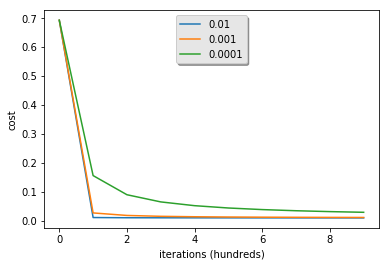

In [273]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


m=>> 1
df 4096
(1, 4096) (4096, 1)
y = 1.0
b'cat'
[[0.00364767]
 [0.00363727]
 [0.00365176]
 ...
 [0.00424018]
 [0.00421988]
 [0.0041449 ]] [0.02033155]


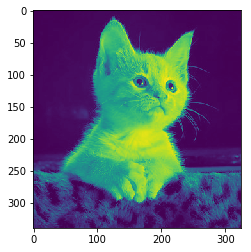

In [308]:
#/home/ash/Desktop/New_Project_File/17-5/CNN
#Desktop/project/learn/images/cat1.jpg
my_image = "cat1.jpg"  
fname = "/home/ash/Desktop/New_Project_File/17-5/CNN/" + my_image
image = np.array(ndimage.imread(fname, flatten=True))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1,num_px*num_px)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image))) 
print(classes[int(np.squeeze(my_predicted_image)),])
#.decode("utf-8") +  "\" picture.")
print(d["w"],d["b"])